In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import scipy
#Read the tearchingratings.csv
df=pd.read_csv(r"D:\Downloads\Statistics-for-Data-Science-using-Python\Statistics Classwork\Project - Boston Housing Data Analysis\teachingratings.csv")
df

,minority,age,gender,credits,beauty,eval,division,native,tenure,students,allstudents,prof,PrimaryLast,vismin,female,single_credit,upper_division,English_speaker,tenured_prof
0,yes,36,female,more,0.289916,4.3,upper,yes,yes,24,43,1,0,1,1,0,1,1,1
1,yes,36,female,more,0.289916,3.7,upper,yes,yes,86,125,1,0,1,1,0,1,1,1
2,yes,36,female,more,0.289916,3.6,upper,yes,yes,76,125,1,0,1,1,0,1,1,1
3,yes,36,female,more,0.289916,4.4,upper,yes,yes,77,123,1,1,1,1,0,1,1,1
4,no,59,male,more,-0.737732,4.5,upper,yes,yes,17,20,2,0,0,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458,no,37,male,more,0.933396,3.5,upper,yes,yes,15,17,40,1,0,0,0,1,1,1
459,no,58,female,more,0.111563,3.5,upper,yes,yes,26,34,47,1,0,1,0,1,1,1
460,no,42,male,more,-0.900580,4.0,upper,yes,yes,45,86,61,1,0,0,0,1,1,1
461,no,39,male,more,0.643014,4.3,upper,yes,yes,22,29,62,1,0,0,0,1,1,1


C:\Users\UD SYSTEMS\AppData\Local\Temp\ipykernel_38468\1820549428.py:20: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df['eval'],


[Text(0.5, 0, 'Normal Distribution'), Text(0, 0.5, 'Frequency')]

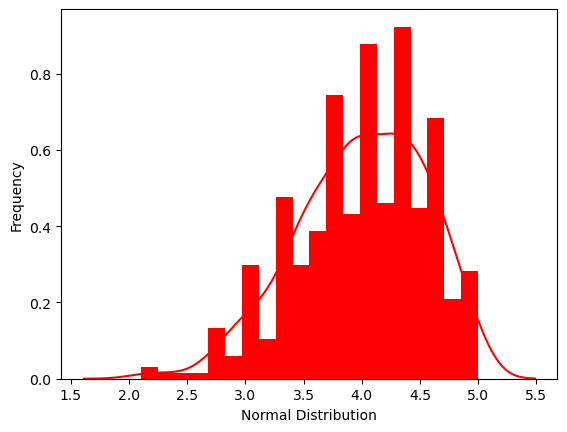

In [3]:
'''
Q1 T-Test: Using the teachers' rating data set, does gender affect teaching evaluation rates?
We will be using the t-test for independent samples. For the independent t-test, the following assumptions must be met.

One independent, categorical variable with two levels or group
One dependent continuous variable
Independence of the observations. Each subject should belong to only one group. There is no relationship between the observations in each group.
The dependent variable must follow a normal distribution
Assumption of homogeneity of variance


State the hypothesis

H0:µ1=µ2
 ("there is no difference in evaluation scores between male and females")
H1:µ1 not equal µ2
 ("there is a difference in evaluation scores between male and females")
We can plot the dependent variable with a historgram
'''
ax = sns.distplot(df['eval'],
                  bins=20,
                  kde=True,
                  color='red',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Normal Distribution', ylabel='Frequency')
## we can assume it is normal


In [4]:
#We can use the Levene's Test in Python to check test significance
scipy.stats.levene(df[df['gender'] == 'female']['eval'],
                   df[df['gender'] == 'male']['eval'], center='mean')

# since the p-value is greater than 0.05 we can assume equality of variance

LeveneResult(statistic=0.19032922435292574, pvalue=0.6628469836244741)

In [5]:
scipy.stats.ttest_ind(df[df['gender'] == 'female']['eval'],
                   df[df['gender'] == 'male']['eval'],equal_var=True)

#Conclusion: Since the p-value is less than alpha value 0.05, we reject the null hypothesis as there is enough proof 
#that there is a statistical difference in teaching evaluations based on gender

TtestResult(statistic=-3.249937943510772, pvalue=0.0012387609449522217, df=461.0)

In [10]:
'''
ANOVA: Using the teachers' rating data set, does teaching evaluation score for instructors differ by age?
Test for equality of variance

# eval score is our dependent variable or target variable
# independent variable age
Null Hypothesis H0= Eval score differ by age
Alternate Hypothesis H1= Eval score not differ by age
'''
df.loc[(df['age'] <= 40),'age_group']='40 years and younger'
df.loc[(df['age'] > 40)&(df['age'] < 57), 'age_group'] = 'between 40 and 57 years'
df.loc[(df['age'] >= 57), 'age_group'] = '57 years and older'

scipy.stats.levene(df[df['age_group'] == '40 years and younger']['eval'],
                   df[df['age_group'] == 'between 40 and 57 years']['eval'], 
                   df[df['age_group'] == '57 years and older']['eval'], 
                   center='mean')


LeveneResult(statistic=3.820237661494229, pvalue=0.02262141852021939)

In [11]:
forty_lower_eval = df[df['age_group'] == '40 years and younger']['eval']
forty_fiftyseven_eval = df[df['age_group'] == 'between 40 and 57 years']['eval']
fiftyseven_older_eval = df[df['age_group'] == '57 years and older']['eval']

In [12]:
f_statistic, p_value = scipy.stats.f_oneway(forty_lower_eval, forty_fiftyseven_eval, fiftyseven_older_eval)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))
'''
**Conclusion:** Since the p-value is greater than 0.05, we will fail to reject the null hypothesis as 
there is no significant evidence that at least one of the means differ.
'''

F_Statistic: 1.2226327996572206, P-Value: 0.29540894225417536


In [21]:
'''
CHI SQUARE Test --- Goodnesss of fit test
The chi-square test is used to compare observed data with expected data to 
see if the differences are due to chance or if there's a real relationship between the variables being studied. 

'''
#Understand the Chi Square Test
#Population
#Categories--- White, Black , Hispanic, Asian, Other
national = pd.DataFrame(["white"]*100000 + ["hispanic"]*60000 +\
                        ["black"]*50000 + ["asian"]*15000 + ["other"]*35000)
           
#Sample Size
minnesota = pd.DataFrame(["white"]*600 + ["hispanic"]*300 + \
                         ["black"]*250 +["asian"]*75 + ["other"]*150)
#print("**********************************************************************")
#print(national)
#print("**********************************************************************")
#print(minnesota)
#print("**********************************************************************")
national_table = pd.crosstab(index=national[0], columns="count")
minnesota_table = pd.crosstab(index=minnesota[0], columns="count")

print( "National")
print(national_table)
print(" ")
print( "Minnesota")
print(minnesota_table)



National
col_0      count
0               
asian      15000
black      50000
hispanic   60000
other      35000
white     100000
 
Minnesota
col_0     count
0              
asian        75
black       250
hispanic    300
other       150
white       600


In [25]:
#Null Hypothesis ---- the two distributions(obeserve and expected) are the same.

observed=minnesota_table
print(observed)
national_ratios = national_table/len(national)  # Get population ratios
print("******************************Get population ratios****************************************")
print(national_ratios)
#print(len(minnesota)) #1375
expected = national_ratios * len(minnesota)   # Get expected counts
print("*********************Expected Counts******************")
print(expected)
print("*********************Chi Square Stat***********************")
chi_squared_stat = (((observed-expected)**2)/expected).sum()

print(chi_squared_stat)

col_0     count
0              
asian        75
black       250
hispanic    300
other       150
white       600
******************************Get population ratios****************************************
col_0        count
0                 
asian     0.057692
black     0.192308
hispanic  0.230769
other     0.134615
white     0.384615
*********************Expected Counts******************
col_0          count
0                   
asian      79.326923
black     264.423077
hispanic  317.307692
other     185.096154
white     528.846154
*********************Chi Square Stat***********************
col_0
count    18.194805
dtype: float64


In [24]:
#Note: The chi-squared test assumes none of the expected counts are less than 5 i.e.0.05 .
"""
Similar to the t-test where we compared the t-test statistic to a critical value based on the t-distribution to 
determine whether the result is significant, in the chi-square test we compare the chi-square test statistic to a 
critical value based on the chi-square distribution. The scipy library shorthand for the chi-square distribution is chi2. 
Let's use this knowledge to find the critical value for 95% confidence level and check the p-value of our result:
"""

crit = scipy.stats.chi2.ppf(q = 0.95, # Find the critical value for 95% confidence*
                      df = 4)   # Df = number of variable categories - 1 --- Goodness of fit test

print("Critical value")
print(crit)

Critical value
9.487729036781154


In [27]:
p_value = 1 - scipy.stats.chi2.cdf(x=chi_squared_stat,  # Find the p-value
                             df=4)
print("P value")
print(p_value)

P value
[0.00113047]


In [29]:
"""
You can carry out a chi-squared goodness-of-fit test automatically using the scipy function scipy.stats.chisquare():
"""
scipy.stats.chisquare(f_obs= observed,   # Array of observed counts
                f_exp= expected)   # Array of expected counts

Power_divergenceResult(statistic=array([18.19480519]), pvalue=array([0.00113047]))

In [31]:
"""
EXAMPLE
Chi SQUARED TEST OF INDEPENDENCE 
"""
np.random.seed(10)

# Sample data randomly at fixed probabilities
voter_race = np.random.choice(a= ["asian","black","hispanic","other","white"],
                              p = [0.05, 0.15 ,0.25, 0.05, 0.5],
                              size=1000)

# Sample data randomly at fixed probabilities
voter_party = np.random.choice(a= ["democrat","independent","republican"],
                              p = [0.4, 0.2, 0.4],
                              size=1000)

voters = pd.DataFrame({"race":voter_race, 
                       "party":voter_party})
#print(voters)
voter_tab = pd.crosstab(voters.race, voters.party, margins = True)

voter_tab.columns = ["democrat","independent","republican","row_totals"]

voter_tab.index = ["asian","black","hispanic","other","white","col_totals"]

         race        party
0       white     democrat
1       asian   republican
2       white  independent
3       white   republican
4       other     democrat
..        ...          ...
995     white   republican
996  hispanic  independent
997     black  independent
998     white   republican
999     black     democrat

[1000 rows x 2 columns]


In [34]:
print(voter_tab)
print(voter_tab.columns)
print(voter_tab.index)

            democrat  independent  republican  row_totals
asian             21            7          32          60
black             65           25          64         154
hispanic         107           50          94         251
other             15            8          15          38
white            189           96         212         497
col_totals       397          186         417        1000
Index(['democrat', 'independent', 'republican', 'row_totals'], dtype='object')
Index(['asian', 'black', 'hispanic', 'other', 'white', 'col_totals'], dtype='object')


In [36]:
# Get table without totals for later use
observed = voter_tab.iloc[0:5,0:3]   
print(voter_tab)
print(observed)


            democrat  independent  republican  row_totals
asian             21            7          32          60
black             65           25          64         154
hispanic         107           50          94         251
other             15            8          15          38
white            189           96         212         497
col_totals       397          186         417        1000
          democrat  independent  republican
asian           21            7          32
black           65           25          64
hispanic       107           50          94
other           15            8          15
white          189           96         212


In [39]:
"""
Note that we did not use the race data to inform our generation of the party data so the variables are independent.

For a test of independence, we use the same chi-squared formula that we used for the goodness-of-fit test. 
The main difference is we have to calculate the expected counts of each cell in a 2-dimensional table instead of a
1-dimensional table. To get the expected count for a cell, multiply the row total for that cell by the 
column total for that cell and then divide by the total number of observations. We can quickly get the expected 
counts for all cells in the table by taking the row totals and column totals of the table, performing an outer 
product on them with the np.outer() function and dividing by the number of observations:
"""
print(voter_tab["row_totals"][0:5])
print(voter_tab.loc["col_totals"][0:3])
print("************************************************")
expected =  np.outer(voter_tab["row_totals"][0:5],
                     voter_tab.loc["col_totals"][0:3]) / 1000
expected = pd.DataFrame(expected)
print(expected)

asian        60
black       154
hispanic    251
other        38
white       497
Name: row_totals, dtype: int64
democrat       397
independent    186
republican     417
Name: col_totals, dtype: int64
************************************************
         0       1        2
0   23.820  11.160   25.020
1   61.138  28.644   64.218
2   99.647  46.686  104.667
3   15.086   7.068   15.846
4  197.309  92.442  207.249


In [46]:
"""
Now we can follow the same steps we took before to calculate the chi-square statistic, the critical value and the p-value:
"""
#print(((observed-expected)**2)/expected)
chi_squared_stat = (((observed-expected)**2)/expected).sum().sum()

print(chi_squared_stat)

0.0


In [52]:
"""
Note: We call .sum() twice: once to get the column sums and a second time to add the column sums together, returning the sum of the entire 2D table.
"""
##For a chi-square test of independence , degree of freedom(df) = (number of rows - 1) * (number of columns - 1) 
crit = scipy.stats.chi2.ppf(q = 0.95, # Find the critical value for 95% confidence*
                      df = 8)   # *5x3 rowsxcols df=4*2=8

print("Critical value")
print(crit)

p_value = 1 - scipy.stats.chi2.cdf(x=chi_squared_stat,  # Find the p-value
                             df=8)
print("P value")
print(p_value)


Critical value
15.50731305586545
P value
1.0


In [54]:
"""
Note: The degrees of freedom for a test of independence equals the product of the number of categories in each variable minus 1. In this case we have a 5x3 table so df = 4x2 = 8.

As with the goodness-of-fit test, we can use scipy to conduct a test of independence quickly. Use stats.chi2_contingency() function to conduct a test of independence automatically given a frequency table of observed counts:
"""
print(scipy.stats.chi2_contingency(observed= observed))

"""
The output shows the chi-square statistic, the p-value and the degrees of freedom followed by the expected counts.

As expected, given the high p-value, the test result does not detect a significant relationship between the variables.
"""

Chi2ContingencyResult(statistic=7.169321280162059, pvalue=0.518479392948842, dof=8, expected_freq=array([[ 23.82 ,  11.16 ,  25.02 ],
       [ 61.138,  28.644,  64.218],
       [ 99.647,  46.686, 104.667],
       [ 15.086,   7.068,  15.846],
       [197.309,  92.442, 207.249]]))


In [55]:
#Teacher's rating dataset
df

,minority,age,gender,credits,beauty,eval,division,native,tenure,students,allstudents,prof,PrimaryLast,vismin,female,single_credit,upper_division,English_speaker,tenured_prof,age_group
0,yes,36,female,more,0.289916,4.3,upper,yes,yes,24,43,1,0,1,1,0,1,1,1,40 years and younger
1,yes,36,female,more,0.289916,3.7,upper,yes,yes,86,125,1,0,1,1,0,1,1,1,40 years and younger
2,yes,36,female,more,0.289916,3.6,upper,yes,yes,76,125,1,0,1,1,0,1,1,1,40 years and younger
3,yes,36,female,more,0.289916,4.4,upper,yes,yes,77,123,1,1,1,1,0,1,1,1,40 years and younger
4,no,59,male,more,-0.737732,4.5,upper,yes,yes,17,20,2,0,0,0,0,1,1,1,57 years and older
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458,no,37,male,more,0.933396,3.5,upper,yes,yes,15,17,40,1,0,0,0,1,1,1,40 years and younger
459,no,58,female,more,0.111563,3.5,upper,yes,yes,26,34,47,1,0,1,0,1,1,1,57 years and older
460,no,42,male,more,-0.900580,4.0,upper,yes,yes,45,86,61,1,0,0,0,1,1,1,between 40 and 57 years
461,no,39,male,more,0.643014,4.3,upper,yes,yes,22,29,62,1,0,0,0,1,1,1,40 years and younger


In [56]:
'''
Chi-square: Using the teachers' rating data set, is there an association between tenure and gender?
State the hypothesis:

𝐻0:
  The proportion of teachers who are tenured is independent of gender
𝐻1:
  The proportion of teachers who are tenured is associated with gender

'''
#Create a Cross-tab table
cont_table  = pd.crosstab(df['tenure'], df['gender'])
cont_table

gender,female,male
tenure,,
no,50,52
yes,145,216


In [57]:
'''
Use the scipy.stats library and set correction equals False as that will be the same answer when done by hand, 
it returns: 𝜒2 value, p-value, degree of freedom, and expected values.
'''
scipy.stats.chi2_contingency(cont_table, correction = True)
'''
Conclusion: Since the p-value is greater than 0.05, we fail to reject the null hypothesis. 
As there is no sufficient evidence that teachers are tenured as a result of gender.
'''

Chi2ContingencyResult(statistic=2.20678166999886, pvalue=0.1374050603563787, dof=1, expected_freq=array([[ 42.95896328,  59.04103672],
       [152.04103672, 208.95896328]]))

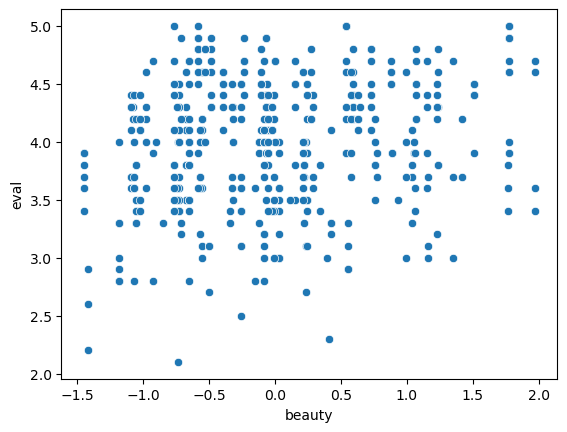

In [58]:
'''
Correlation: Using the teachers rating dataset, Is teaching evaluation score correlated with beauty score?
State the hypothesis:

𝐻0:
  Teaching evaluation score is not correlated with beauty score
𝐻1:
  Teaching evaluation score is correlated with beauty score

'''
#Since they are both continuous variables we can use a pearson correlation test and draw a scatter plot
ax = sns.scatterplot(x="beauty", y="eval", data=df)

In [59]:
scipy.stats.pearsonr(df['beauty'], df['eval'])
'''
Conclusion: Since the p-value (Sig. (2-tailed) < 0.05, we reject the Null hypothesis and conclude that there exists a relationship between beauty and teaching evaluation score.
'''

PearsonRResult(statistic=0.1890390908404521, pvalue=4.247115419813754e-05)

In [60]:
'''
Question 1: Using the teachers rating data set, does tenure affect teaching evaluation scores?
Use α = 0.05
'''
## insert code here
scipy.stats.ttest_ind(df[df['tenure'] == 'yes']['eval'],
                   df[df['tenure'] == 'no']['eval'], equal_var = True)

TtestResult(statistic=-2.8046798258451777, pvalue=0.005249471210198792, df=461.0)

In [61]:
'''
Question 2: Using the teachers rating data set, is there an association between age and tenure?
Discretize the age into three groups 40 years and youngers, between 40 and 57 years, 57 years and older (This has already been done for you above.)
What is your conclusion at α = 0.01 and α = 0.05?

'''
## use the chi-square function
scipy.stats.chi2_contingency(cont_table, correction = True)


Chi2ContingencyResult(statistic=2.20678166999886, pvalue=0.1374050603563787, dof=1, expected_freq=array([[ 42.95896328,  59.04103672],
       [152.04103672, 208.95896328]]))

In [62]:
'''
Question 3: Test for equality of variance for beauty scores between tenured and non-tenured instructors
Use α = 0.05
'''
### use the levene function to find the p-value and conclusion
scipy.stats.levene(df[df['tenure'] == 'yes']['beauty'],
                   df[df['tenure'] == 'no']['beauty'], 
                   center='mean')

LeveneResult(statistic=0.4884241652750426, pvalue=0.4849835158609811)

In [63]:
'''
Question 4: Using the teachers rating data set, is there an association between visible minorities and tenure?
Use α = 0.05
'''
## insert code here
scipy.stats.chi2_contingency(cont_table, correction = True)

Chi2ContingencyResult(statistic=2.20678166999886, pvalue=0.1374050603563787, dof=1, expected_freq=array([[ 42.95896328,  59.04103672],
       [152.04103672, 208.95896328]]))